In [1]:
import matplotlib.pyplot as plt
import numpy as np

Simulate values for the regression:

In [2]:
def simulate_datapoints(slope, intercept):
    X_data = [np.arange(start=1, stop=21, step=0.00005)]
    X_data = np.array(X_data).T
    print("Simulated X:", X_data.shape)

    Y_data = slope * X_data[:, 0] + intercept + np.random.normal(loc=0, scale=0, size=len(X_data))
    Y_data = Y_data.reshape(-1, 1)
    print("Simulated Y:", Y_data.shape)
    return X_data, Y_data

Sample dataset:

Simulated X: (400000, 1)
Simulated Y: (400000, 1)


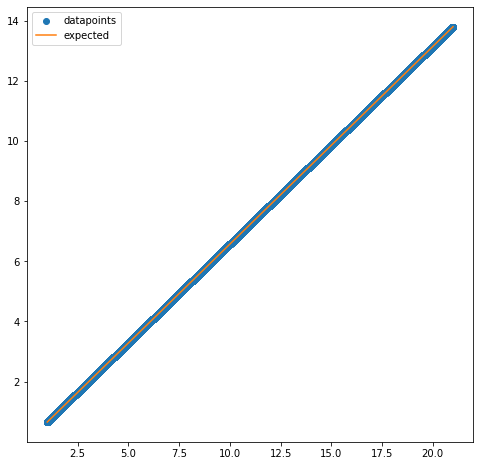

In [3]:
SLOPE, INTERCEPT = 0.657, 0
X_data, Y_data = simulate_datapoints(SLOPE, INTERCEPT)

fig = plt.figure(figsize=(8, 8))
plt.scatter(X_data[:, 0], Y_data, label='datapoints')
plt.plot(X_data[:, 0], SLOPE * X_data[:, 0] + INTERCEPT, color='#ff7f0e', label='expected')
plt.legend(loc='best')
plt.savefig('regression_example.png')
plt.show();

## QUBO Formulation:

Define the `Linear Regression` problem:

In [4]:
from regression import QuantumRegressor
# del QuantumRegressor

Make prediction using different basis and precision:

In [46]:
regressor = QuantumRegressor(sampler='simulated', precision=3)
regressor.build_problem(X_data, Y_data)
regressor.solve(label='Testing')

[1 0 1]
Predicted Slope: 0.625
Predicted Intercept: 0.351999200000674


/Users/vvcastro/Studies/Courses/Machine Learning/SE2 - Quantum ML/code/regression.py:56: SamplerUnknownArgWarning: Ignoring unknown kwarg: 'label'
  self.sampleset = self.sampler.sample(bqm=self.bqm, label=label)


'Done!'

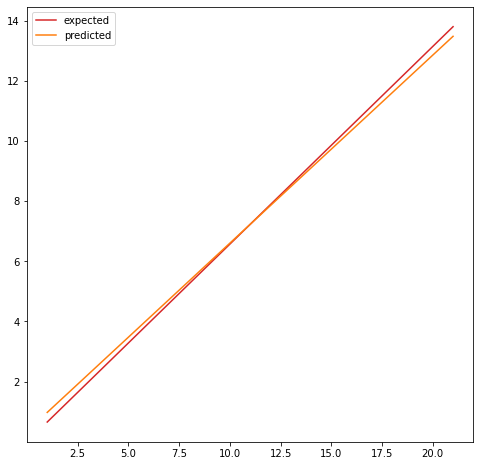

In [47]:
fig = plt.figure(figsize=(8, 8))
# plt.scatter(X_data[:, 0], Y_data, label='datapoints')
plt.plot(X_data[:, 0], SLOPE * X_data + INTERCEPT, color='#d62728', label='expected')
plt.plot(X_data[:, 0], regressor.predicted_slope * X_data + regressor.predicted_intercept, color='#ff7f0e', label='predicted')
plt.legend(loc='best')
plt.savefig('qml.png')
plt.show();

### Compare with Sklearn:

In [48]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_data, Y_data)
sk_predicted = X_data * reg.coef_ + reg.intercept_
sk_mean_sqr_error = np.square(sk_predicted - Y_data).mean()
print(sk_mean_sqr_error)

2.1011801707883456e-30


In [49]:
reg.coef_, reg.intercept_

(array([[0.657]]), array([0.]))

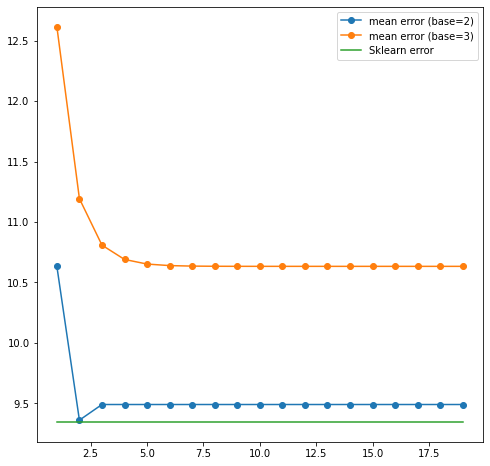

In [814]:
fig = plt.figure(figsize=(8, 8))
plt.plot(precisions, errors_base2, 'o-', label='mean error (base=2)')
plt.plot(precisions, errors_base3, 'o-', label='mean error (base=3)')
plt.plot(precisions, [sk_mean_sqr_error] * len(precisions), label='Sklearn error')
plt.legend(loc='best')
plt.savefig('metrics.png')
plt.show();

In [64]:
regressor.P_matrix

array([[0.125, 0.25 , 0.5  , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.125, 0.25 , 0.5  ]])